In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import random
import seaborn as sns
import matplotlib as mpl

In [2]:
df = pd.read_csv("身高预测参照表-1.csv")
print(df)

      Unnamed: 0    足长  步幅          身高
0              0  21.0  60  157.266284
1              1  21.0  61  157.873103
2              2  21.0  62  158.389684
3              3  21.0  63  157.980905
4              4  21.0  64  159.769893
...          ...   ...  ..         ...
2695        2695  28.4  91  189.590254
2696        2696  28.4  92  190.634375
2697        2697  28.4  93  192.146455
2698        2698  28.4  94  191.956749
2699        2699  28.4  95  190.726344

[2700 rows x 4 columns]


<AxesSubplot:>

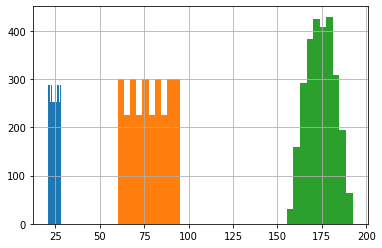

In [3]:
df["足长"].hist()
df["步幅"].hist()
df["身高"].hist()

In [4]:
# 查看空数据
print(df.isnull().sum())

Unnamed: 0    0
足长            0
步幅            0
身高            0
dtype: int64


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 36275 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 38271 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 36523 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 39640 missing from current font.
  font.set_tex

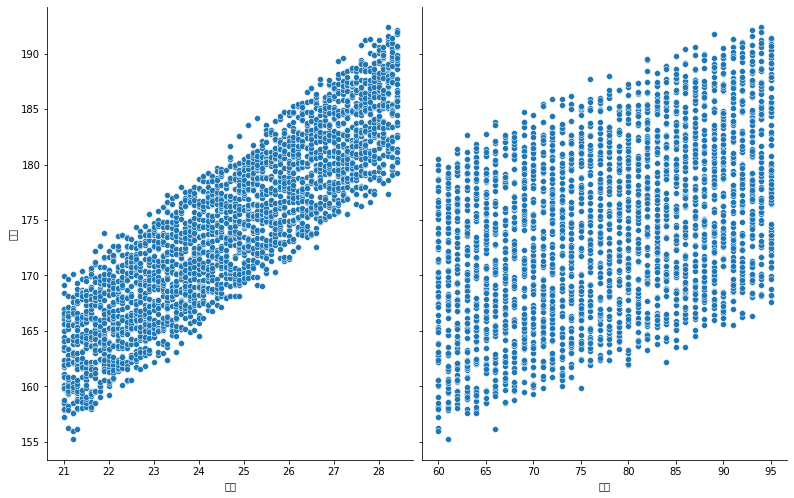

In [5]:
def runplt():
    plt.figure()
    plt.title(u'(foot_length+stride_length) - height curver')
    plt.xlabel(u'length')
    plt.ylabel(u'height')
    plt.axis([0, 25, 0, 25])
    plt.grid(True)
    return plt

# visualize the relationship between the features and the response using scatterplots
plt.rcParams['font.sans-serif'] = ['SimHei'] # 处理中文
sns.pairplot(df,x_vars=["足长","步幅"], y_vars=["身高"], height=7,aspect=0.8)
plt.show()

In [6]:
# 线性回归模型
feature_cols = ["足长","步幅"]
X = df[feature_cols]
y = df["身高"]
print(X.head(), type(X), X.shape)
print(y.head())

     足长  步幅
0  21.0  60
1  21.0  61
2  21.0  62
3  21.0  63
4  21.0  64 <class 'pandas.core.frame.DataFrame'> (2700, 2)
0    157.266284
1    157.873103
2    158.389684
3    157.980905
4    159.769893
Name: 身高, dtype: float64


In [7]:
###### create model
#  构建训练集与测试集\
# random.seed(1000)
# x2 = random.sample(X, 500)

X_train,X_test,Y_train,Y_test = train_test_split(X,y,random_state=1)
#default split is 75% for training and 25% for testing
print(X_train.shape, X_test.shape, np.shape(Y_train), np.shape(Y_test))


(2025, 2) (675, 2) (2025,) (675,)


In [8]:
# linear regression
linreg = LinearRegression()
model = linreg.fit(X_train,Y_train)
print(model)
print(linreg.intercept_)  # 截距
print(linreg.coef_) # 回归系数
# y = 70.78192744173342 + 3.16626482*'足长' + 0.32716884*'步幅'


LinearRegression()
70.78192744173342
[3.16626482 0.32716884]


In [9]:
# 预测
result = model.predict(np.array([24.2,73]).reshape(1,2))[0]
print(result)
print('预测足长为24.2，步长为73的身高：%.4f' % result)  # 171.2889

Y_predict = model.predict(X_test)
print(Y_predict)
# plt.plot(X,Y,'k.')
# plt.plot(x2,y2_predict,'g-')

171.28886106433407
预测足长为24.2，步长为73的身高：171.2889
[180.00645375 178.63452427 171.18308168 171.60548755 171.98536816
 166.60271797 183.62675149 175.89030949 173.60012763 181.24133261
 190.17012822 181.27295967 179.07765901 177.82205127 183.06729501
 173.24133173 176.42868126 162.99331841 172.40741819 166.50783678
 186.24410219 163.55277489 179.09874372 166.78229384 166.01163443
 162.465489   174.63470175 174.02217766 174.96187058 165.24133085
 184.37597036 177.7373566  178.72940547 177.08301893 164.67133202
 170.47603223 180.71385903 185.03030803 177.29422186 175.22542946
 178.65560898 158.21229412 175.18326004 181.88512793 166.0643462
 175.26759888 181.56850145 168.47084979 165.77970262 187.97482756
 169.27278044 172.08024935 175.77434358 179.23615017 158.8666318
 166.64488739 174.46566824 182.11741557 176.7769348  162.40223487
 180.36560548 173.93783882 158.5289206  188.5448264  189.55795997
 178.05398308 189.56850233 176.86127364 174.0436182  170.85591285
 183.70054798 180.30199552 179.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [10]:
# valuate
# 平均绝对误差( Mean Absolute Error,MAE )
# 均方误差( Mean Squared Error,MSE)
# 均方根误差( Root Mean Squared Error,RMSE)
# here, use RMSE
print(type(Y_predict), type(Y_test))
print(len(Y_predict),len(Y_test))
print(Y_predict.shape, Y_test.shape)
from sklearn import metrics
sum_mean= 0
print(Y_predict[2],Y_test.values[2])
for i in range(len(Y_predict)):
    sum_mean += (Y_predict[i] - Y_test.values[i])**2
sum_erro = np.sqrt(sum_mean/len(Y_predict))
print('RMSE : ',sum_erro)  # 0.9642182209867747

<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
675 675
(675,) (675,)
171.18308168305487 171.2956468
RMSE :  0.9642182209867737


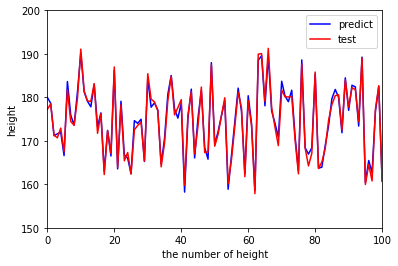

In [27]:
# ROC曲线
plt.figure()
plt.plot(range(len(Y_predict)),Y_predict,'b',label='predict')
plt.plot(range(len(Y_predict)),Y_test,'r',label='test')
plt.legend(loc='upper right') #显示图中的标签
plt.xlabel('the number of height')
plt.ylabel('height')
plt.xlim(0,100) # 只显示100个数据，看得更清楚些
plt.ylim(150,200)
plt.show()

In [28]:
# 模型验证
from sklearn.metrics import r2_score
score =r2_score(Y_test, model.predict(X_test))
print('模型R方值: ', score)

模型R方值:  0.9842621692821675


In [31]:
# 现分析两个单独的变量的公式和模型分析
X1 = df[['足长']]
X2 = df[['步幅']]
print(X1, X2)

        足长
0     21.0
1     21.0
2     21.0
3     21.0
4     21.0
...    ...
2695  28.4
2696  28.4
2697  28.4
2698  28.4
2699  28.4

[2700 rows x 1 columns]       步幅
0     60
1     61
2     62
3     63
4     64
...   ..
2695  91
2696  92
2697  93
2698  94
2699  95

[2700 rows x 1 columns]


In [32]:
# 构造模型
X1_train,X1_test,Y1_train,Y1_test = train_test_split(X1,y,random_state=1)
print(X1_train.shape, X1_test.shape, np.shape(Y1_train), np.shape(Y1_test))
X2_train,X2_test,Y2_train,Y2_test = train_test_split(X2,y,random_state=1)
#default split is 75% for training and 25% for testing
print(X2_train.shape, X2_test.shape, np.shape(Y2_train), np.shape(Y2_test))

(2025, 1) (675, 1) (2025,) (675,)
(2025, 1) (675, 1) (2025,) (675,)


In [33]:
# 线性回归 足长
linreg = LinearRegression()
model1 = linreg.fit(X1_train,Y1_train)
print(model1)
print(linreg.intercept_)  # 截距
print(linreg.coef_) # 回归系数
# y = 96.77740029087168 + 3.13885671*'足长'

LinearRegression()
96.77740029087168
[3.13885671]


In [34]:
# 线性回归 步幅
linreg = LinearRegression()
model2 = linreg.fit(X2_train,Y2_train)
print(model2)
print(linreg.intercept_)  # 截距
print(linreg.coef_) # 回归系数
# y = 149.9348815334656 + 0.3154043*'步幅'

LinearRegression()
149.9348815334656
[0.3154043]


In [35]:
# 预测
result1 = model1.predict(np.array([24.2]).reshape(-1,1))[0]
result2 = model2.predict(np.array([73]).reshape(-1,1))[0]
print('预测足长为24.2的身高：%.4f' % result1)  # 172.7377
print('预测步长为73的身高：%.4f' % result2)  # 172.9594

预测足长为24.2的身高：172.7377
预测步长为73的身高：172.9594


In [36]:
# 预测模型
Y1_predict = model1.predict(X1_test)
Y2_predict = model2.predict(X2_test)


In [37]:
# 评价
sum_mean1= 0
for i in range(len(Y1_predict)):
    sum_mean1 += (Y1_predict[i] - Y1_test.values[i])**2
sum_erro1 = np.sqrt(sum_mean1/len(Y1_predict))
print('RMSE : ',sum_erro1)  # 3.5275566

sum_mean2= 0
for i in range(len(Y2_predict)):
    sum_mean2 += (Y2_predict[i] - Y2_test.values[i])**2
sum_erro2 = np.sqrt(sum_mean2/len(Y2_predict))
print('RMSE : ',sum_erro2)  # 6.7237494609772765

RMSE :  3.527556612652609
RMSE :  6.7237494609772765


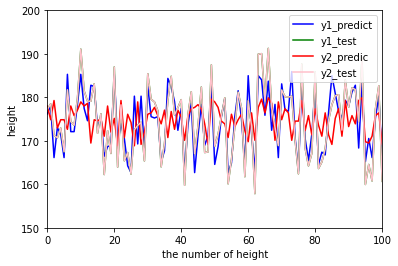

In [39]:
# ROC曲线
plt.figure()
plt.plot(range(len(Y1_predict)),Y1_predict,'b',label='y1_predict')
plt.plot(range(len(Y1_predict)),Y1_test,'g',label='y1_test')
plt.plot(range(len(Y2_predict)),Y2_predict,'r',label='y2_predic')
plt.plot(range(len(Y2_predict)),Y2_test,'pink',label='y2_test')
plt.legend(loc='upper right') #显示图中的标签
plt.xlabel('the number of height')
plt.ylabel('height')
plt.xlim(0,100) # 只显示100个数据，看得更清楚些
plt.ylim(150,200)
plt.show()

In [40]:
# 模型验证
score1 =r2_score(Y1_test, model1.predict(X1_test))
print('模型R方值: ', score1)  # 0.7893593501616174
score2 =r2_score(Y2_test, model2.predict(X2_test))
print('模型R方值: ', score2)  # 0.23472549310444601

模型R方值:  0.7893593501616174
模型R方值:  0.23472549310444601
